IMPORT PACKAGES

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupie


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
columns_names=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PATRATIO","B","LSTAT","MEDV"]
boston_housing_df=pd.read_csv("housing.csv",sep=r"\s+",header=None,names=columns_names)
boston_housing_df.head()

In [ ]:
boston_housing_df.dtypes

In [ ]:
boston_housing_df.isnull().sum()

DATA VISUALIZATION

In [ ]:
plt.hist(boston_housing_df['LSTAT'],bins=50)
plt.gca().set(title="frequency histogram",ylabel="frequency")

In [ ]:
# THE SKEW IS LEFT

In [ ]:
plt.hist(boston_housing_df['MEDV'],bins=50)
plt.gca().set(title="frequency histogram",ylabel="frequency")

In [ ]:
## SKEW IS NORMAL

In [ ]:
plt.hist(boston_housing_df['PATRATIO'],bins=50)
plt.gca().set(title="frequency histogram",ylabel="frequency")

In [ ]:
#SKEW IS RIGHT

In [ ]:
plt.hist(boston_housing_df['TAX'],bins=50)
plt.gca().set(title="frequency histogram",ylabel="frequency")

In [ ]:
##SKEW IS RIGHT

In [ ]:
plt.hist(boston_housing_df['INDUS'],bins=50)
plt.gca().set(title="frequency histogram",ylabel="frequency")

In [ ]:
##SKEW IS TOWARDS RIGHT

In [ ]:
plt.hist(boston_housing_df['AGE'],bins=50)
plt.gca().set(title="frequency histogram",ylabel="frequency")

In [ ]:
#SKEW IS TOWORDS RIGHT

In [ ]:
plt.hist(boston_housing_df['CHAS'],bins=2)
plt.gca().set(title="frequency histogram",ylabel="frequency")

In [ ]:
#TOWARDS RIGHT

In [ ]:
plt.hist(boston_housing_df['RM'],bins=50)
plt.gca().set(title="frequency histogram",ylabel="frequency")

In [ ]:
#NORMAL

In [ ]:
plt.hist(boston_housing_df['NOX'],bins=50)
plt.gca().set(title="frequency histogram",ylabel="frequency")

In [ ]:
## LEFT

In [ ]:
plt.hist(boston_housing_df['DIS'],bins=50)
plt.gca().set(title="frequency histogram",ylabel="frequency")

In [ ]:
## LEFT

In [ ]:
plt.boxplot(boston_housing_df["MEDV"])

In [ ]:
boston_housing_df[boston_housing_df['MEDV']>=40]

In [ ]:
input_df=boston_housing_df[boston_housing_df['MEDV']<50]
input_df.head()

In [ ]:
plt.boxplot(boston_housing_df["RM"])

In [ ]:
plt.boxplot(boston_housing_df["TAX"])

In [ ]:
plt.boxplot(boston_housing_df["LSTAT"])

In [ ]:
plt.boxplot(boston_housing_df["NOX"])

In [ ]:
plt.scatter(input_df["LSTAT"],input_df["MEDV"])
plt.gca().set(title="frequency histogram",ylabel="frequency")

In [ ]:
plt.scatter(input_df["TAX"],input_df["RM"])
plt.gca().set(title="frequency histogram",ylabel="frequency")

[Text(0, 0.5, 'frequency'), Text(0.5, 1.0, 'frequency histogram')]

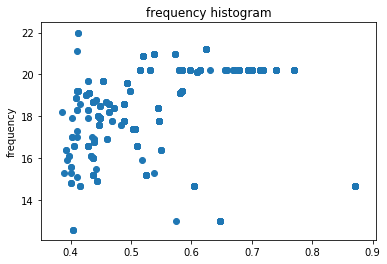

In [60]:
plt.scatter(input_df["NOX"],input_df["PATRATIO"])
plt.gca().set(title="frequency histogram",ylabel="frequency")

[Text(0, 0.5, 'frequency'), Text(0.5, 1.0, 'frequency histogram')]

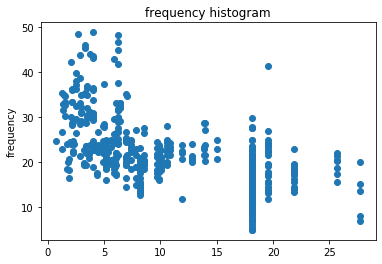

In [61]:
plt.scatter(input_df["INDUS"],input_df["MEDV"])
plt.gca().set(title="frequency histogram",ylabel="frequency")

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

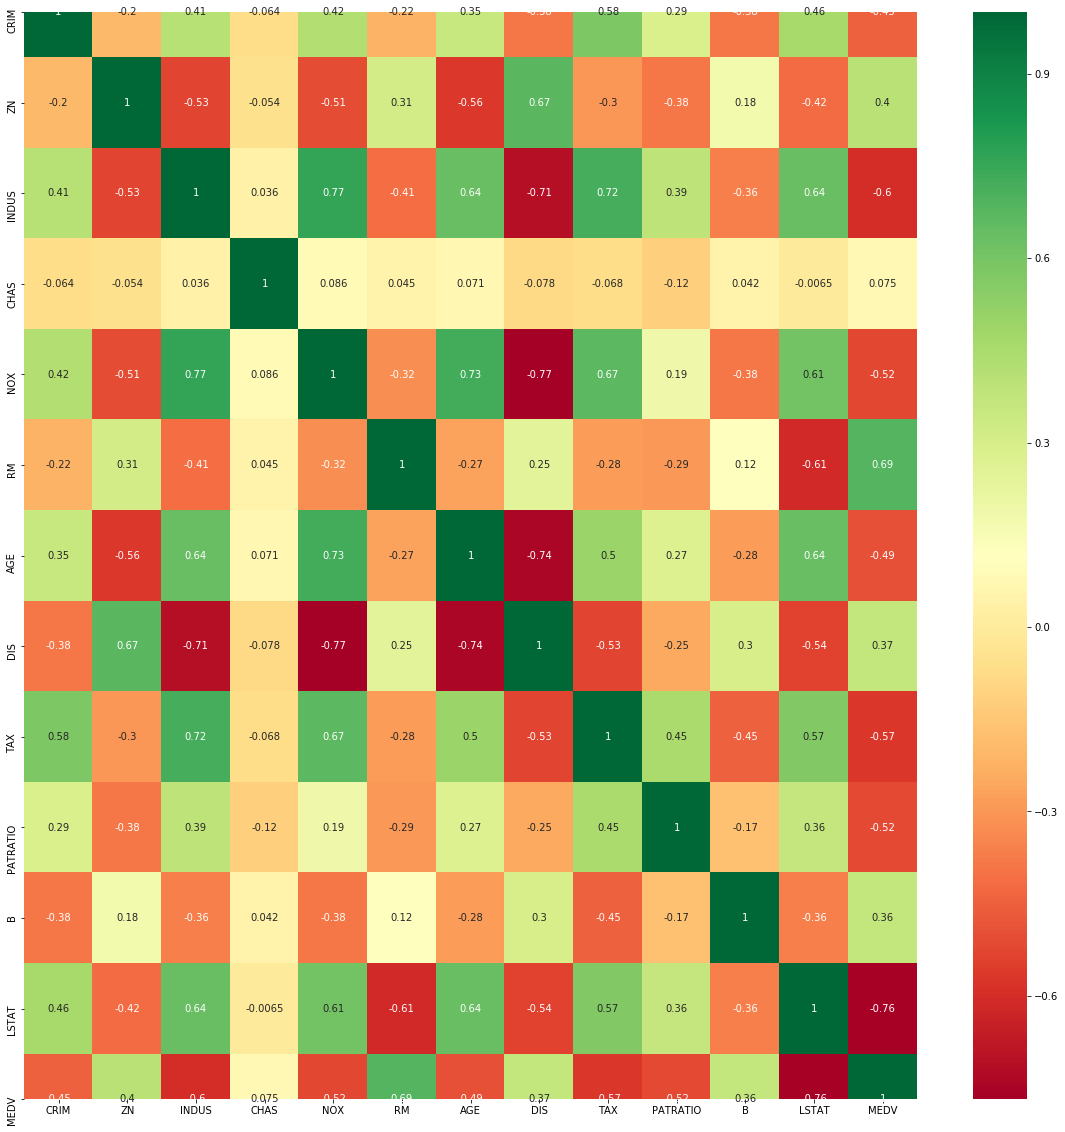

In [63]:
corrmat=input_df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
#heat map
g=sns.heatmap(input_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [64]:
# IN THIS HEAT MAP THE TWO VARIABLES WHICH AS CORRELATED  WHICH AS 'TAX' AND 'RAD'  
#TAX IS USED FOR FUTURE PRIDICTION

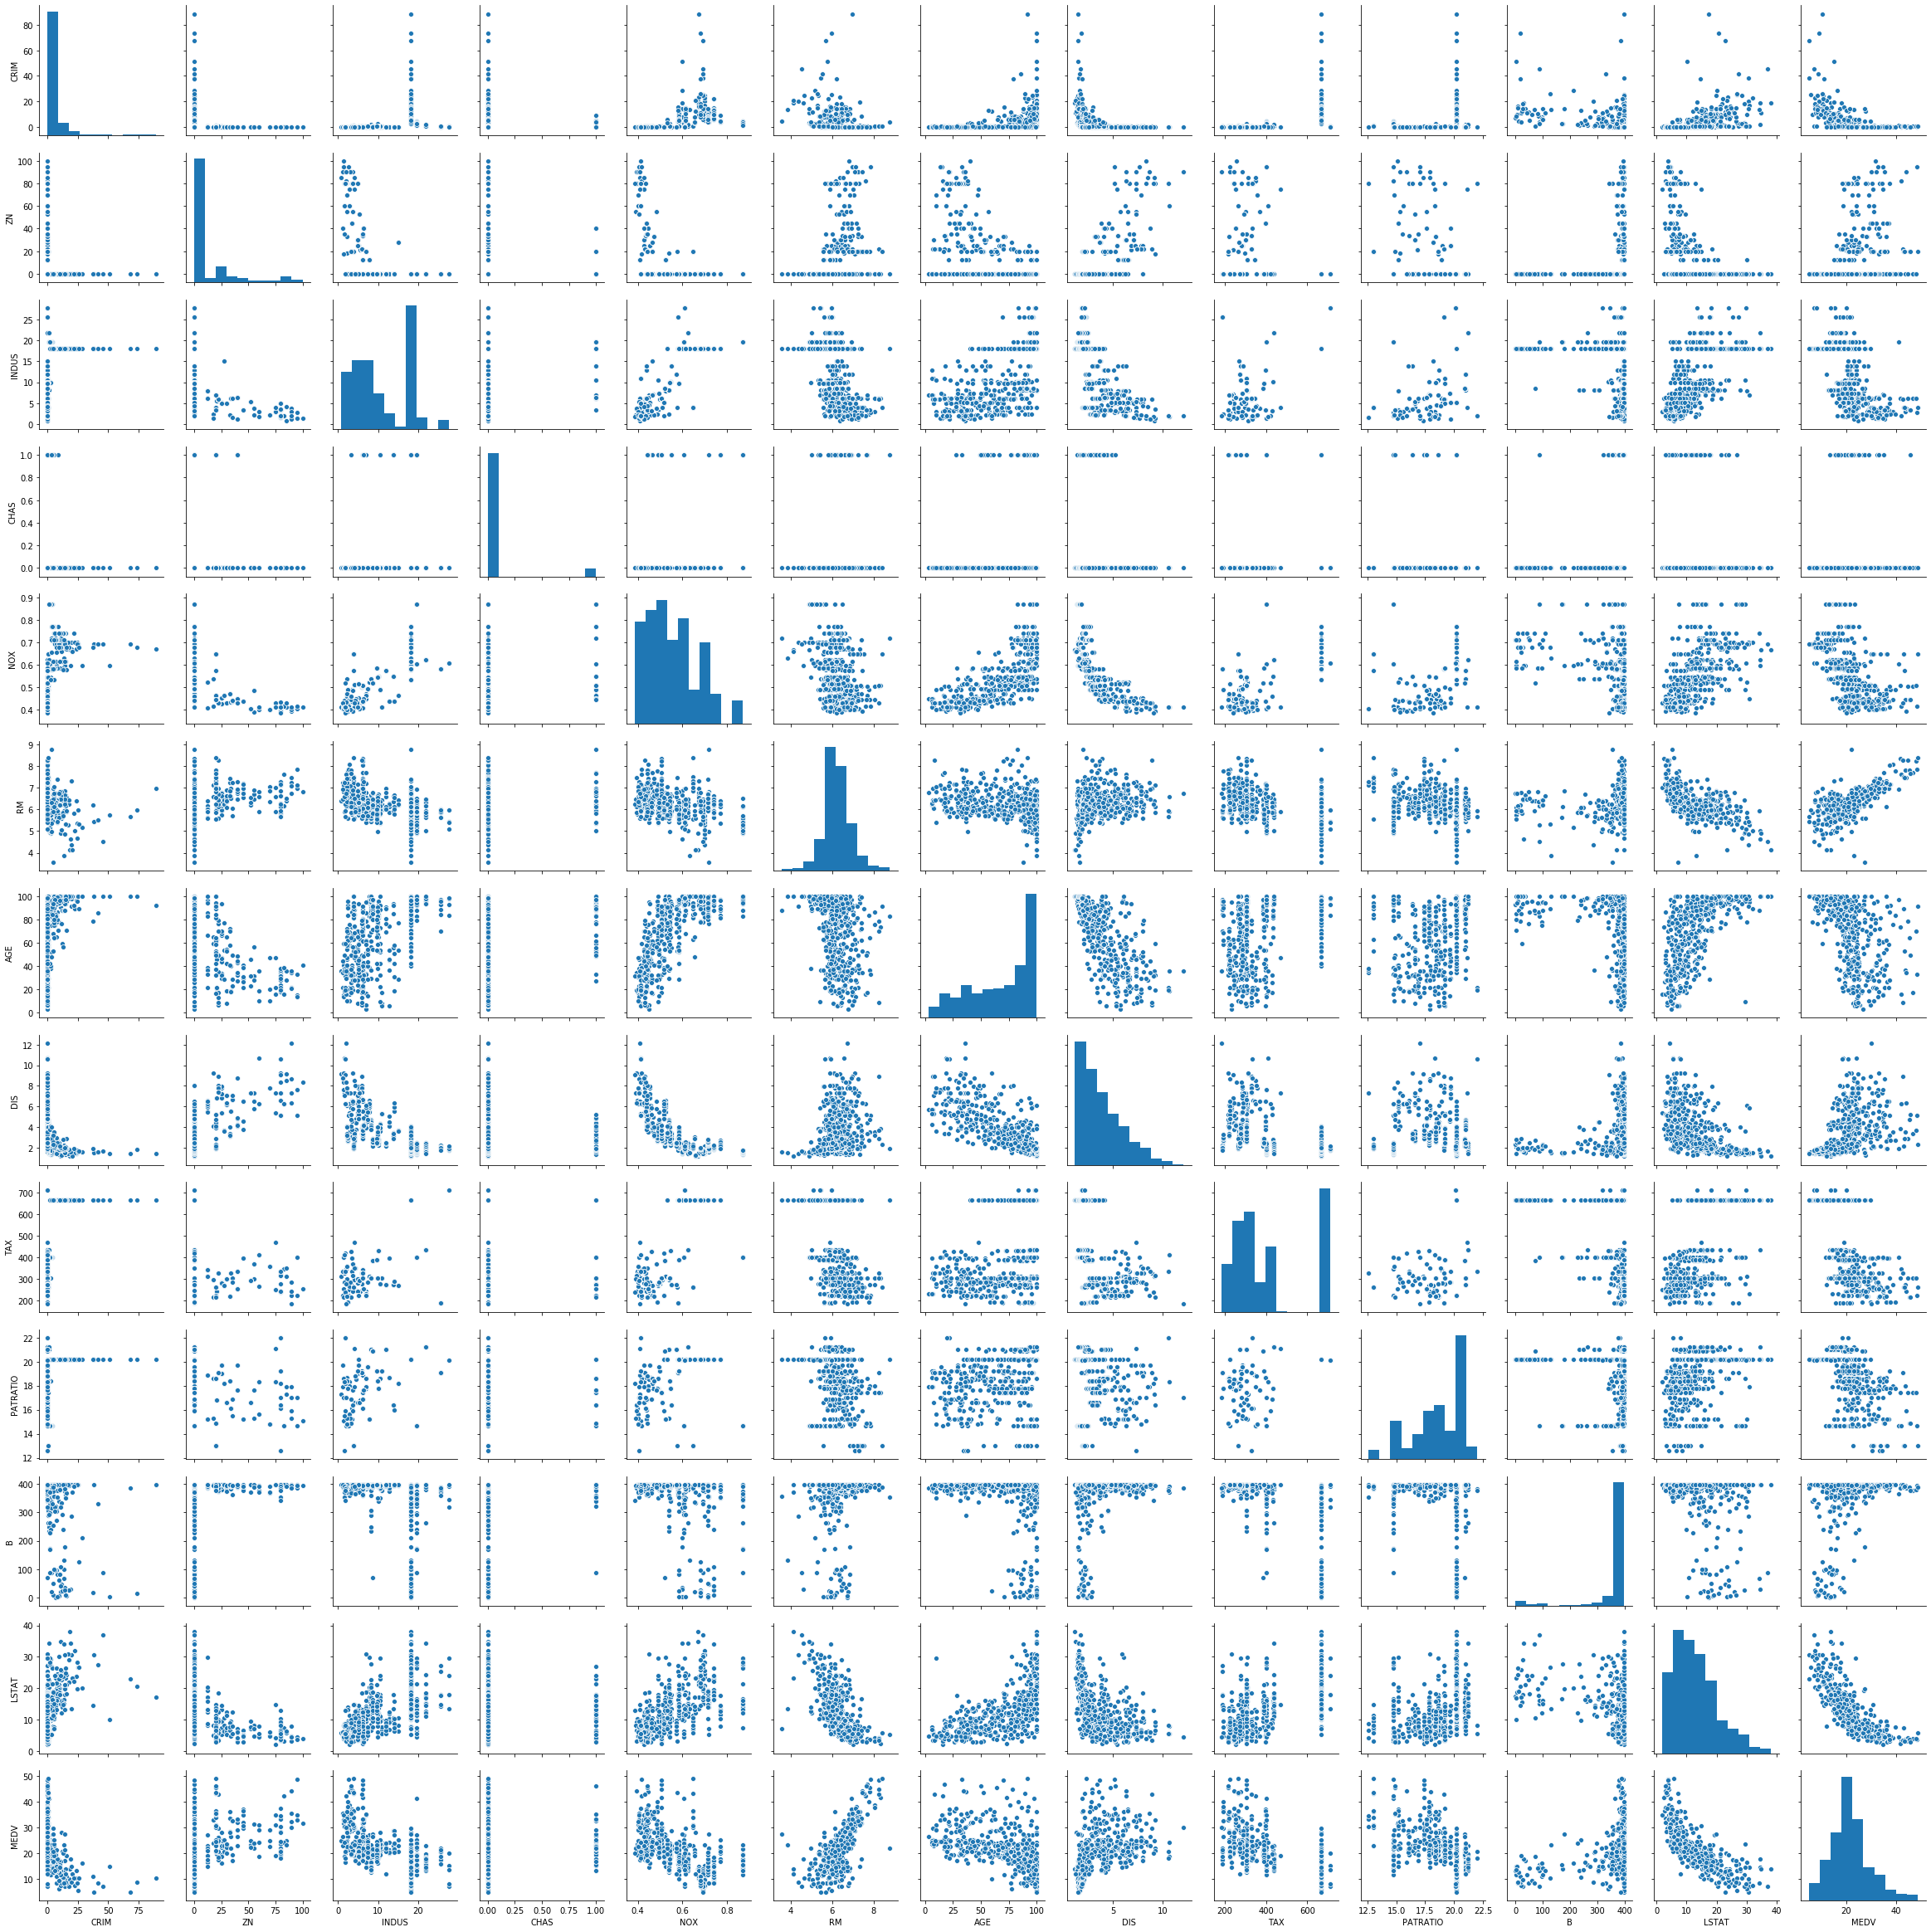

In [89]:
import seaborn as sns
sns.pairplot(input_df)

In [65]:
input_df.drop(['RAD'],axis=1,inplace=True)

KeyError: "['RAD'] not found in axis"

DATA PREPROCESS@

In [66]:
preprocess_df=input_df[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','TAX','PATRATIO','B','LSTAT','MEDV']]
preprocess_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PATRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2


In [67]:
input_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PATRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2


In [68]:

preprocess_df['TAX']=np.log(preprocess_df['TAX'])
preprocess_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PATRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,5.690359,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,5.488938,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,5.488938,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,5.402677,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,5.402677,18.7,396.90,5.33,36.2


In [69]:
preprocess_df['INDUS']=np.log(preprocess_df['INDUS'])
preprocess_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PATRATIO,B,LSTAT,MEDV
0,0.00632,18.0,0.837248,0,0.538,6.575,65.2,4.0900,5.690359,15.3,396.90,4.98,24.0
1,0.02731,0.0,1.955860,0,0.469,6.421,78.9,4.9671,5.488938,17.8,396.90,9.14,21.6
2,0.02729,0.0,1.955860,0,0.469,7.185,61.1,4.9671,5.488938,17.8,392.83,4.03,34.7
3,0.03237,0.0,0.779325,0,0.458,6.998,45.8,6.0622,5.402677,18.7,394.63,2.94,33.4
4,0.06905,0.0,0.779325,0,0.458,7.147,54.2,6.0622,5.402677,18.7,396.90,5.33,36.2


In [70]:
preprocess_df['CRIM']=np.log(preprocess_df['CRIM'])
preprocess_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PATRATIO,B,LSTAT,MEDV
0,-5.064036,18.0,0.837248,0,0.538,6.575,65.2,4.0900,5.690359,15.3,396.90,4.98,24.0
1,-3.600502,0.0,1.955860,0,0.469,6.421,78.9,4.9671,5.488938,17.8,396.90,9.14,21.6
2,-3.601235,0.0,1.955860,0,0.469,7.185,61.1,4.9671,5.488938,17.8,392.83,4.03,34.7
3,-3.430523,0.0,0.779325,0,0.458,6.998,45.8,6.0622,5.402677,18.7,394.63,2.94,33.4
4,-2.672924,0.0,0.779325,0,0.458,7.147,54.2,6.0622,5.402677,18.7,396.90,5.33,36.2


In [71]:
preprocess_df['NOX']=np.log(preprocess_df['NOX'])
preprocess_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PATRATIO,B,LSTAT,MEDV
0,-5.064036,18.0,0.837248,0,-0.619897,6.575,65.2,4.0900,5.690359,15.3,396.90,4.98,24.0
1,-3.600502,0.0,1.955860,0,-0.757153,6.421,78.9,4.9671,5.488938,17.8,396.90,9.14,21.6
2,-3.601235,0.0,1.955860,0,-0.757153,7.185,61.1,4.9671,5.488938,17.8,392.83,4.03,34.7
3,-3.430523,0.0,0.779325,0,-0.780886,6.998,45.8,6.0622,5.402677,18.7,394.63,2.94,33.4
4,-2.672924,0.0,0.779325,0,-0.780886,7.147,54.2,6.0622,5.402677,18.7,396.90,5.33,36.2


In [72]:
preprocess_df['RM']=np.log(preprocess_df['RM'])
preprocess_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PATRATIO,B,LSTAT,MEDV
0,-5.064036,18.0,0.837248,0,-0.619897,1.883275,65.2,4.0900,5.690359,15.3,396.90,4.98,24.0
1,-3.600502,0.0,1.955860,0,-0.757153,1.859574,78.9,4.9671,5.488938,17.8,396.90,9.14,21.6
2,-3.601235,0.0,1.955860,0,-0.757153,1.971996,61.1,4.9671,5.488938,17.8,392.83,4.03,34.7
3,-3.430523,0.0,0.779325,0,-0.780886,1.945624,45.8,6.0622,5.402677,18.7,394.63,2.94,33.4
4,-2.672924,0.0,0.779325,0,-0.780886,1.966693,54.2,6.0622,5.402677,18.7,396.90,5.33,36.2


In [73]:
preprocess_df['AGE']=np.log(preprocess_df['AGE'])
preprocess_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PATRATIO,B,LSTAT,MEDV
0,-5.064036,18.0,0.837248,0,-0.619897,1.883275,4.177459,4.0900,5.690359,15.3,396.90,4.98,24.0
1,-3.600502,0.0,1.955860,0,-0.757153,1.859574,4.368181,4.9671,5.488938,17.8,396.90,9.14,21.6
2,-3.601235,0.0,1.955860,0,-0.757153,1.971996,4.112512,4.9671,5.488938,17.8,392.83,4.03,34.7
3,-3.430523,0.0,0.779325,0,-0.780886,1.945624,3.824284,6.0622,5.402677,18.7,394.63,2.94,33.4
4,-2.672924,0.0,0.779325,0,-0.780886,1.966693,3.992681,6.0622,5.402677,18.7,396.90,5.33,36.2


In [74]:
preprocess_df['B']=np.log(preprocess_df['B'])
preprocess_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PATRATIO,B,LSTAT,MEDV
0,-5.064036,18.0,0.837248,0,-0.619897,1.883275,4.177459,4.0900,5.690359,15.3,5.983684,4.98,24.0
1,-3.600502,0.0,1.955860,0,-0.757153,1.859574,4.368181,4.9671,5.488938,17.8,5.983684,9.14,21.6
2,-3.601235,0.0,1.955860,0,-0.757153,1.971996,4.112512,4.9671,5.488938,17.8,5.973377,4.03,34.7
3,-3.430523,0.0,0.779325,0,-0.780886,1.945624,3.824284,6.0622,5.402677,18.7,5.977949,2.94,33.4
4,-2.672924,0.0,0.779325,0,-0.780886,1.966693,3.992681,6.0622,5.402677,18.7,5.983684,5.33,36.2


In [75]:
preprocess_df['PATRATIO']=np.log(preprocess_df['PATRATIO'])
preprocess_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PATRATIO,B,LSTAT,MEDV
0,-5.064036,18.0,0.837248,0,-0.619897,1.883275,4.177459,4.0900,5.690359,2.727853,5.983684,4.98,24.0
1,-3.600502,0.0,1.955860,0,-0.757153,1.859574,4.368181,4.9671,5.488938,2.879198,5.983684,9.14,21.6
2,-3.601235,0.0,1.955860,0,-0.757153,1.971996,4.112512,4.9671,5.488938,2.879198,5.973377,4.03,34.7
3,-3.430523,0.0,0.779325,0,-0.780886,1.945624,3.824284,6.0622,5.402677,2.928524,5.977949,2.94,33.4
4,-2.672924,0.0,0.779325,0,-0.780886,1.966693,3.992681,6.0622,5.402677,2.928524,5.983684,5.33,36.2


In [76]:
preprocess_df['LSTAT']=np.log(preprocess_df['LSTAT'])
preprocess_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PATRATIO,B,LSTAT,MEDV
0,-5.064036,18.0,0.837248,0,-0.619897,1.883275,4.177459,4.0900,5.690359,2.727853,5.983684,1.605430,24.0
1,-3.600502,0.0,1.955860,0,-0.757153,1.859574,4.368181,4.9671,5.488938,2.879198,5.983684,2.212660,21.6
2,-3.601235,0.0,1.955860,0,-0.757153,1.971996,4.112512,4.9671,5.488938,2.879198,5.973377,1.393766,34.7
3,-3.430523,0.0,0.779325,0,-0.780886,1.945624,3.824284,6.0622,5.402677,2.928524,5.977949,1.078410,33.4
4,-2.672924,0.0,0.779325,0,-0.780886,1.966693,3.992681,6.0622,5.402677,2.928524,5.983684,1.673351,36.2


In [77]:
preprocess_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PATRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [78]:
x=preprocess_df.iloc[:,0:12]
y=preprocess_df["MEDV"]
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PATRATIO,B,LSTAT
0,-5.064036,18.0,0.837248,0,-0.619897,1.883275,4.177459,4.0900,5.690359,2.727853,5.983684,1.605430
1,-3.600502,0.0,1.955860,0,-0.757153,1.859574,4.368181,4.9671,5.488938,2.879198,5.983684,2.212660
2,-3.601235,0.0,1.955860,0,-0.757153,1.971996,4.112512,4.9671,5.488938,2.879198,5.973377,1.393766
3,-3.430523,0.0,0.779325,0,-0.780886,1.945624,3.824284,6.0622,5.402677,2.928524,5.977949,1.078410
4,-2.672924,0.0,0.779325,0,-0.780886,1.966693,3.992681,6.0622,5.402677,2.928524,5.983684,1.673351
...,...,...,...,...,...,...,...,...,...,...,...,...
501,-2.770511,0.0,2.479056,0,-0.556870,1.886008,4.235555,2.4786,5.609472,3.044522,5.971236,2.269028
502,-3.095111,0.0,2.479056,0,-0.556870,1.811562,4.339902,2.2875,5.609472,3.044522,5.983684,2.206074
503,-2.800824,0.0,2.479056,0,-0.556870,1.942476,4.510860,2.1675,5.609472,3.044522,5.983684,1.729884
504,-2.211009,0.0,2.479056,0,-0.556870,1.916040,4.492001,2.3889,5.609472,3.044522,5.974954,1.868721


In [79]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 490, dtype: float64

In [80]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [81]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PATRATIO,B,LSTAT
8,-1.554760,12.5,2.063058,0,-0.646264,1.728287,4.605170,6.0821,5.739793,2.721295,5.957468,3.398861
193,-3.822639,60.0,1.075002,0,-0.913794,1.916923,2.292535,6.2196,5.579730,2.747271,5.974751,1.615420
440,3.093362,0.0,2.895912,0,-0.301105,1.760957,4.526127,1.8662,6.501290,3.005683,5.969858,3.096030
474,2.086391,0.0,2.895912,0,-0.537854,1.691386,4.558079,2.4298,6.501290,3.005683,5.865278,2.898119
154,0.346316,0.0,2.974509,1,-0.138113,1.813032,4.564348,1.7494,5.998937,2.687847,5.771503,2.716018
...,...,...,...,...,...,...,...,...,...,...,...,...
334,-3.286619,0.0,1.646734,0,-0.663588,1.842136,3.650658,6.4584,5.411646,3.005683,5.964607,1.909543
198,-3.278626,80.0,0.418710,0,-0.906340,1.984306,3.645450,7.3090,5.796058,2.533697,5.971772,1.890095
117,-1.890608,0.0,2.303585,0,-0.603306,1.795253,4.414010,2.7474,6.068426,2.879198,5.977644,2.332144
47,-1.472855,0.0,1.932970,0,-0.802962,1.796747,4.448516,5.6894,5.451038,2.884801,5.973148,2.933857


In [82]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PATRATIO,B,LSTAT
246,-1.079310,22.0,1.768150,0,-0.841647,1.809599,3.552487,8.0555,5.799093,2.949688,5.966608,2.214846
183,-2.301785,0.0,0.900161,0,-0.717440,1.881448,4.560173,2.8470,5.262690,2.879198,5.983684,1.736951
453,2.109982,0.0,2.895912,0,-0.338274,2.000534,4.598146,2.4527,6.501290,3.005683,5.929243,2.817801
336,-3.373485,0.0,1.646734,0,-0.663588,1.769684,3.835142,5.2311,5.411646,3.005683,5.983684,2.282382
15,-0.466187,0.0,2.096790,0,-0.619897,1.763703,4.034241,4.4986,5.726848,3.044522,5.980454,2.136531
...,...,...,...,...,...,...,...,...,...,...,...,...
306,-2.589867,33.0,0.779325,0,-0.750776,2.004179,4.275276,3.0992,5.402677,2.912351,5.983684,1.867176
142,1.200281,0.0,2.974509,1,-0.138113,1.686954,4.605170,1.3216,5.998937,2.687847,5.983684,3.289148
323,-1.259063,0.0,1.998774,0,-0.707246,1.741869,4.308111,4.7211,5.659482,2.975530,5.969040,2.463002
7,-1.934130,12.5,2.063058,0,-0.646264,1.820023,4.565389,5.9505,5.739793,2.721295,5.983684,2.952303


In [83]:
y_train

8      16.5
193    31.1
440    10.5
474    13.8
154    17.0
       ... 
334    20.7
198    34.6
117    19.2
47     16.6
176    23.2
Name: MEDV, Length: 392, dtype: float64

In [84]:
y_test

246    24.3
183    32.5
453    17.8
336    19.5
15     19.9
       ... 
306    33.4
142    13.4
323    18.5
7      27.1
102    18.6
Name: MEDV, Length: 98, dtype: float64

In [92]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
classifier = LinearRegression()
classifier.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [94]:
# Making the Confusion Matrix
from sklearn.metrics import r2_score
cm = r2_score(y_test,y_pred)
cm

0.7622156355548522